In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random

In [4]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [5]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [6]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [7]:
def makeCirc(n, state):
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(state)
    circ.initialize(initializedState, qr)
    return circ

In [102]:
def increment(n, currentState):
    circ = makeCirc(n, currentState)
    for i in range(n-1, 0, -1):
        circ.mct([j for j in range(n-i, n)], n-i-1)
    circ.x(n-1)
    circ.barrier()
    circ.measure(range(n), range(n))
    return circ

In [109]:
n = 5
circ = increment(n, '0'*n)

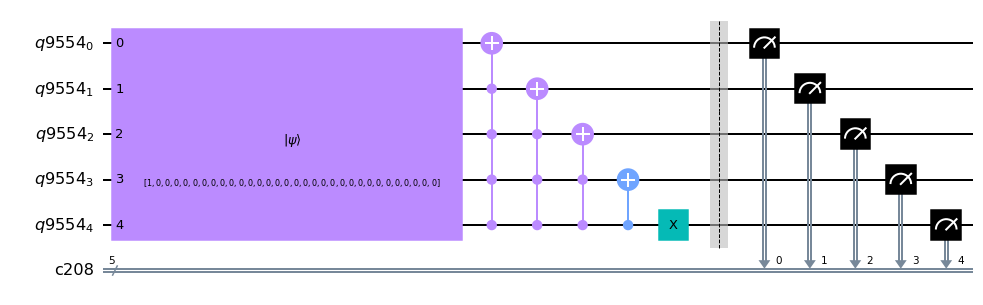

In [110]:
circ.draw('mpl')

In [111]:
def decrement(n, currentState):
    circ = makeCirc(n, currentState)
    circ.x(n-1)
    for i in range(1, n):
        circ.mct([j for j in range(n-i, n)], n-i-1)
    circ.barrier()
    circ.measure(range(n), range(n))
    return circ

In [112]:
circ = decrement(n, '0'*n)

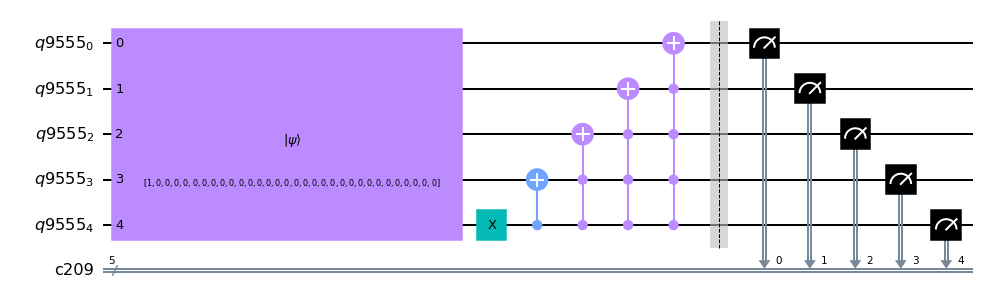

In [113]:
circ.draw('mpl', fold=-1)

In [114]:
n = 4
circ = increment(n, '0'*n)
for i in range(0, 15):
    circ = increment(n, getMeasure(circ, 1)[0][::-1])
    print(getMeasure(circ, 1)[0][::-1])

0010
0011
0100
0101
0110
0111
1000
1001
1010
1011
1100
1101
1110
1111
0000
